In [1]:
using CSV, DataFrames, PyPlot, ScikitLearn, Random

# support vector classifier
@sk_import svm : SVC
# K-folds cross validation
using ScikitLearn.CrossValidation: KFold

## read in the data
The source of the data is [here](https://archive.ics.uci.edu/ml/datasets/Wine).

Each row of `wine_data.csv` represents measurements on a different bottle of wine-- one of two varieties. The three columns are:
* `class`: the label, i.e. what variety/class of wine it is. the label is not explicitly given, but think: Pinot Noir (-1) vs. Syrah (1).
* `alcohol`: the first feature, percent alcohol in the wine
* `malic_acid`: the second feature, malic acid concentration in the wine

In [2]:
df = CSV.read("wine.csv", copycols=true)
first(df, 5)

,class,alcohol,malic_acid
,Int64,Float64,Float64
1,-1,12.37,0.94
2,-1,12.33,1.1
3,-1,12.64,1.36
4,-1,13.67,1.25
5,-1,12.37,1.13


how many wines are in each class?

In [3]:
df_by_class = groupby(df, :class)
negative_class = length(df_by_class[1][:,:class])
positive_class = length(df_by_class[2][:,:class])
println("The -1 class has $negative_class and 1 class has $positive_class")

The -1 class has 71 and 1 class has 48


## visualize the data

draw a scatter plot of the data scattered in 2D feature space. color each data point by the class label. use hollow circles to help see points that are overlapping.

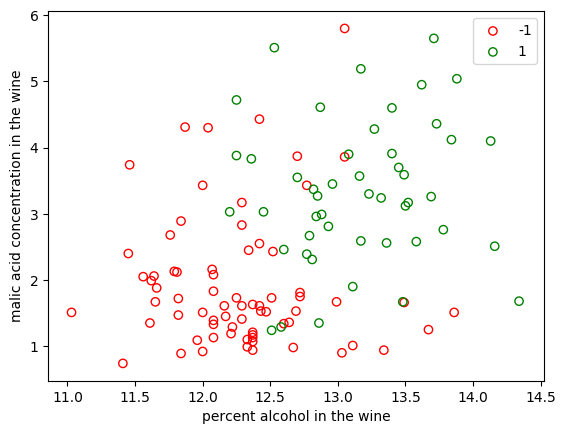

PyObject <matplotlib.legend.Legend object at 0x1118cccf8>

In [4]:
color_scheme = Dict("-1"=>"r", "1"=>"g")
figure()
xlabel("percent alcohol in the wine")
ylabel("malic acid concentration in the wine")
for df_o in groupby(df, :class)
    class = df_o[1, :class]
    class = string(class)
    scatter(df_o[:,:alcohol], df_o[:,:malic_acid], facecolor="None",
        edgecolor=color_scheme[class],label = class)
end
#scatter(x_new[1],x_new[2])
legend()
#grid("on")

## getting data ready for input to scikitlearn

to build a predictive model in scikitlearn:
* construct a feature matrix `X` that has `n_wines` rows and `2` columns (one column for each feature)
* construct a column vector `y` with the labels

loop through the rows of the wine `DataFrame` and populate each entry of the feature matrix `X` and target vector `y` with appropriate values

In [5]:
n_wines = nrow(df)
x = zeros(n_wines, 2)
y = zeros(n_wines)
for (i, n_wine) in enumerate(eachrow(df))
    x[i,1]=n_wine[:alcohol]
    x[i,2]=n_wine[:malic_acid]
    if (n_wine[:class]==-1)
        y[i]=0
    else
        y[i]=1
    end
end
y
size(x)

(119, 2)

## training a support vector machine (SVM)

train a support vector machine to classify wines using *all* of the data. evaluate the accuracy on the training data. we'll later show through cross-validation that this is an overestimate of the true accuracy of the SVM classifier on unseen data. use `C=1.0`. use the linear kernel. [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) is the documentation for the `SVC` function (Support Vector Classifier) in scikitlearn.

```julia
# use a linear kernel
clf = SVC(kernel="linear", C=1.0)
```

In [6]:
clf = SVC(kernel="linear", C=1.0, gamma="auto")
clf.fit(x,y)
#x = [11.5 1]
#clf.predict(x)

PyObject SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## visualize the decision boundary

draw the decision boundary (in feature space) learned by the SVM trained on test data. Also plot the data in feature space (with the decision boundary) with different colors/symbols for the different classes (exactly as in `# visualize the data`). hint: follow the class notes for k-nearest neighbors, using `contourf`, but this is not the only way.

In [7]:
alcohol = 10.5:0.05:15
malic_acid = 0:0.05:6
knn_prediction = zeros(length(malic_acid), length(alcohol))
fill!(knn_prediction, NaN)
for i = 1:length(alcohol)
    for j = 1:length(malic_acid)
        y_value = [alcohol[i] malic_acid[j]]
        #knn.predict(x_here)
        knn_prediction[j,i] = clf.predict(y_value)[1]
    end
end
#minimum(x[:,2])
knn_prediction

121×91 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

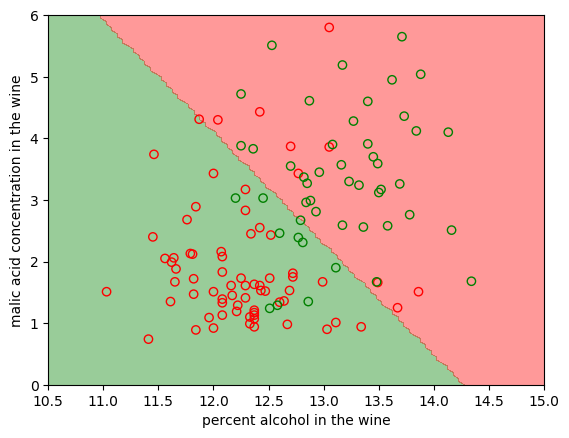

In [8]:
figure()
xlabel("percent alcohol in the wine")
ylabel("malic acid concentration in the wine")
contourf(alcohol,malic_acid,knn_prediction,[-1.0,0.5,2.0],colors=["g","r"], alpha = 0.4)
for df_o in groupby(df, :class)
    class = df_o[1, :class]
    class = string(class)
    scatter(df_o[:,:alcohol], df_o[:,:malic_acid], facecolor="None",
        edgecolor=color_scheme[class],label = class)
end

## $K=5$-fold cross validation
use $K=5$-fold cross validation to:
* choose the optimal `C` parameter in the SVM classifier
* assess the accuracy of the model on unseen data

plot the average test set accuracy (average over the $K$ folds) against the `C` parameter used.

report the best `C` parameter and the associated average test set error (`argmax` might be useful). This test set error is a quality metric of how well the SVM will perform on new, unseen data that is not in the training set. explore the following set of `C` parameters: `c_params = 10.0 .^ range(-3, stop=0, length=25)`. 

c_params = 10.0 .^ range(-3, stop=0, length=25)
for c in c_params
    println("c is $c")
end

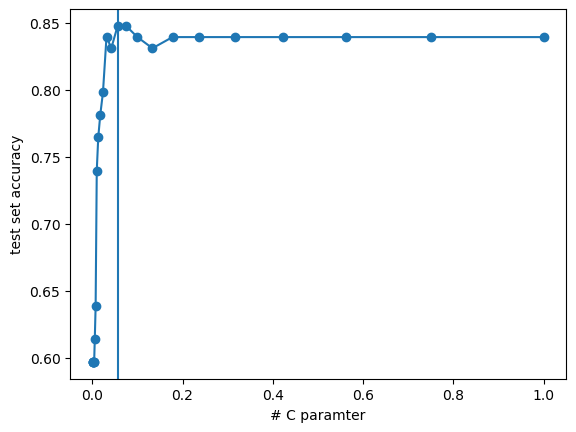

The C parameter with the highest test accuracy is = 0.05623413251903491


In [13]:
using ScikitLearn.CrossValidation: KFold

K = 5 # number of folds

kf = KFold(n_wines, n_folds=K, shuffle=true)

c_params = 10.0 .^ range(-3, stop=0, length=25)

kf

#ks = 1:20
test_accuracy = zeros(length(c_params))
for (i,c) in enumerate(c_params)
#accuracy = 0.0
 test_accuracy[i]=0.0 
#println(size(x))
for (train_ids, test_ids) in kf
    clf = SVC(kernel="linear", C=c, gamma="auto")
    #println(train_ids)
    clf.fit(x[train_ids, :], y[train_ids])    
    #y_pred = knn.predict(x[test_ids, :])
    #accuracy = sum(y_pred.==y[test_ids])/length(test_ids)
    #accuracy = knn.score(x[test_ids,:],y[test_ids])
    #println("accuracy = ", accuracy)
    test_accuracy[i] +=clf.score(x[test_ids, :], y[test_ids])
end
    test_accuracy[i]/=K
#println("test set accuracy for k = ",k," is ", accuracy/K)
end

k_max_test_accuracy = findfirst(maximum(test_accuracy).==test_accuracy)
k_max_test_accuracy = c_params[k_max_test_accuracy]
#k_max_test_accuracy = argmax(test_accuracy)
figure()
xlabel("# C paramter")
ylabel("test set accuracy") 
plot(c_params, test_accuracy, marker ="o")
axvline(x=k_max_test_accuracy)
println("The C parameter with the highest test accuracy is = ", k_max_test_accuracy)

#c= range(-3, stop=0, length=25)

my conclusion: The C parameter with the highest test accuracy varies anytime the simulation repeated

K = 5 # number of folds

kf = KFold(n_wines, n_folds=K, shuffle=true)

c_params = 10.0 .^ range(-3, stop=0, length=25)

kf

#ks = 1:20
test_accuracy = zeros(length(c_params))
nb_text_max = 1000
k_max_test_accuracy= zeros(nb_text_max)
for u = 1:nb_text_max
    test_accuracy = zeros(length(c_params))
for (i,c) in enumerate(c_params)
#accuracy = 0.0
 test_accuracy[i]=0.0 
#println(size(x))
for (train_ids, test_ids) in kf
    clf = SVC(kernel="linear", C=c, gamma="auto")
    #println(train_ids)
    clf.fit(x[train_ids, :], y[train_ids])    
    #y_pred = knn.predict(x[test_ids, :])
    #accuracy = sum(y_pred.==y[test_ids])/length(test_ids)
    #accuracy = knn.score(x[test_ids,:],y[test_ids])
    #println("accuracy = ", accuracy)
    test_accuracy[i] +=clf.score(x[test_ids, :], y[test_ids])
end
    test_accuracy[i]/=K
#println("test set accuracy for k = ",k," is ", accuracy/K)
end

k_max_test_accuracy[u] = findfirst(maximum(test_accuracy).==test_accuracy)
#k_max_test_accuracy[u] = c_params[k_max_test_accuracy[u]]
end
k_max_test_accuracy